In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("card_transdata.csv")

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df1=df

In [5]:
df1.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

(array([912597.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  87403.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

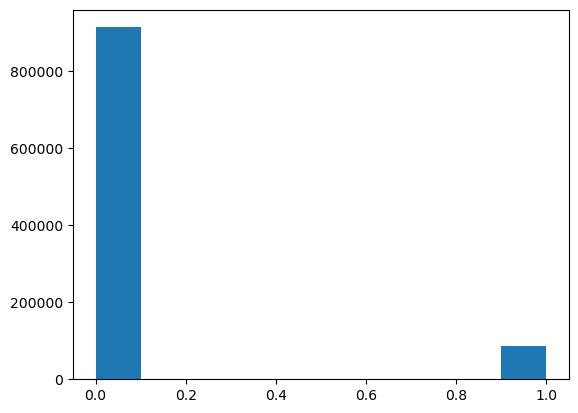

In [7]:
plt.hist(df1['fraud'])

In [8]:
#imbalanced data...

In [9]:
#lets see effect of other data cols on fraud customers...

In [10]:
cols=list(df1.columns)

In [11]:
cols.pop()

'fraud'

In [12]:
cols

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

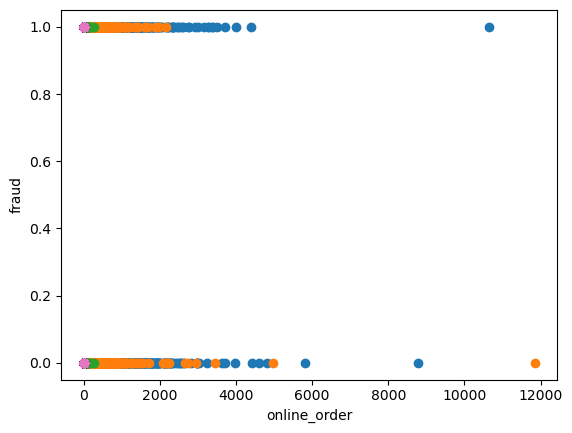

In [17]:
for i in cols:
    plt.scatter(df1[i],df1['fraud'])
    plt.xlabel(i)
    plt.ylabel('fraud')
    

In [18]:
#check for null data in csv>>>

In [19]:
df1.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [20]:
#no null data....

In [21]:
#now apply MinMaxscaler or Standardscaler to dtataset except...fraud cols...

In [22]:
y=df1.pop('fraud')

In [23]:
x=df1

In [24]:
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [25]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [26]:
#now scale the data for x data

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scale=MinMaxScaler()

In [29]:
x1=x

In [30]:
x1[cols]=scale.fit_transform(x1[cols])

In [31]:
x1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,0.000207,0.000009,0.006058,1.0,1.0,0.0,0.0
999996,0.001869,0.000226,0.010358,1.0,1.0,0.0,0.0
999997,0.000274,0.000124,0.000798,1.0,1.0,0.0,1.0
999998,0.000400,0.000020,0.001760,1.0,0.0,0.0,1.0


In [32]:
#data is csled...

In [33]:
#now divide dataset in x_train,y_train etc...

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.22,random_state=42)

In [36]:
x_train.shape

(780000, 7)

In [37]:
y_train.shape

(780000,)

In [38]:
x_test.shape

(220000, 7)

In [39]:
y_test.shape

(220000,)

In [40]:
#now we are using knn model to classify the data...

In [41]:
#we can also plot fraud col data with countplot.....sns.countplot(x='fraud',data=df['fraud'])

In [42]:
from sklearn.neighbors import KNeighborsClassifier


In [43]:
knn=KNeighborsClassifier()

In [44]:
knn

KNeighborsClassifier()

In [45]:
from sklearn import metrics

In [46]:
#calculating accuracy of model for diff k values....

In [47]:
mean_acc=np.zeros(20)
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    mean_acc[i-1]=metrics.accuracy_score(y_pred,y_test)#importing accuracy score metrics from metrics...
    
mean_acc    

C:\Users\91916\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\91916\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.99901818, 0.99877273, 0.99908636, 0.99890909, 0.999     ,
       0.99884545, 0.99899091, 0.99884545, 0.99894545, 0.99884545,
       0.99892727, 0.99880455, 0.99885909, 0.99877273, 0.9988    ,
       0.99872727, 0.99883182, 0.99870909, 0.99879091, 0.99868182])

In [48]:
mean_acc

array([0.99901818, 0.99877273, 0.99908636, 0.99890909, 0.999     ,
       0.99884545, 0.99899091, 0.99884545, 0.99894545, 0.99884545,
       0.99892727, 0.99880455, 0.99885909, 0.99877273, 0.9988    ,
       0.99872727, 0.99883182, 0.99870909, 0.99879091, 0.99868182])

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
#now we got accuracy for k no of cluster from 1 to 20...

In [52]:
#then...plot graph for this accuracy...

Text(0, 0.5, 'Accuracy')

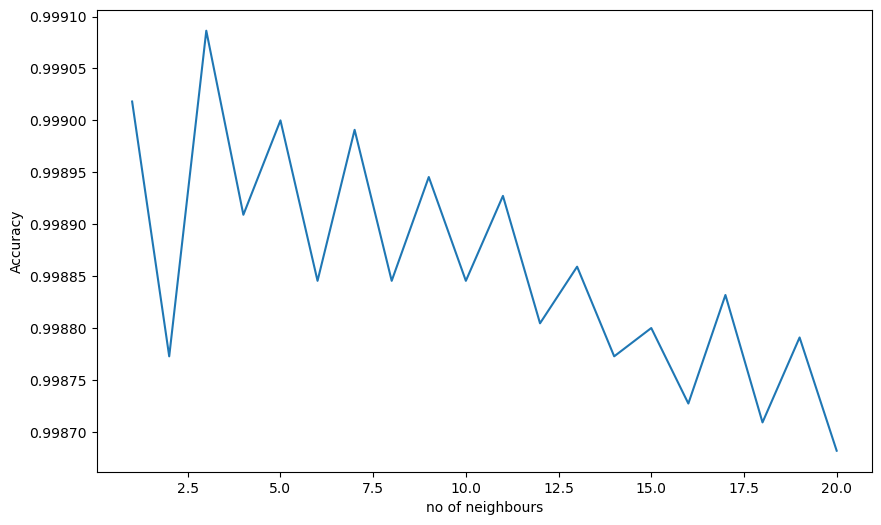

In [59]:
loc=np.arange(1,21,step=1.0)
plt.figure(figsize=(10,6))
plt.plot(range(1,21), mean_acc)
plt.xlabel('no of neighbours')
plt.ylabel('Accuracy')

In [60]:
#now with hyperparametr tuning...

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid_params={'n_neighbors' : [5,7,9,11],
            'weights':['uniform','distance'],
            'metric' :['minkowski','euclidean','manhattan']}

In [64]:
gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)#n_jibs=-1 means all cpu cores are used for this...

In [65]:
#now fitting the data...

In [66]:
gs_fit=gs.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [67]:
gs_fit.best_score_#best accuracy....

0.9990320512820512

In [69]:
gs_fit.best_params_#thsi are best parameters for the knn by gridsearch cv...

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [71]:
print('best parametrs for model....',gs_fit.best_params_,'best accuracy',gs_fit.best_score_)

best parametrs for model.... {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'} best accuracy 0.9990320512820512


In [72]:
#now build the KNN model on best parametrs...

In [74]:
knn_best=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='brute',metric='manhattan')
knn_best.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [75]:
y_pred_best=knn_best.predict(x_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(metrics.accuracy_score(y_pred_best,y_test),
     classification_report(y_pred_best,y_test))

0.9991772727272727               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200918
         1.0       0.99      1.00      1.00     19082

    accuracy                           1.00    220000
   macro avg       1.00      1.00      1.00    220000
weighted avg       1.00      1.00      1.00    220000



In [78]:
from sklearn.metrics import confusion_matrix

In [81]:
print(metrics.accuracy_score(y_pred_best,y_test))#accuracy after gridseachcv

0.9991772727272727


In [82]:
print(classification_report(y_pred_best,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200918
         1.0       0.99      1.00      1.00     19082

    accuracy                           1.00    220000
   macro avg       1.00      1.00      1.00    220000
weighted avg       1.00      1.00      1.00    220000



In [83]:
print(confusion_matrix(y_pred_best,y_test))

[[200796    122]
 [    59  19023]]
